In [1]:
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from matplotlib import pyplot as plt
import numpy as np
import pc

In [2]:
print(tf.__version__)

2.6.0


(1, 3, 224, 224)


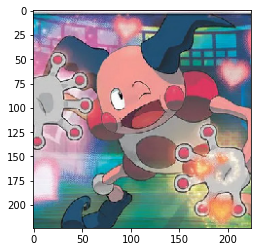

In [11]:
# Load TFLite model and allocate tensors.
# import cv2

TFLITE_MODEL="./sesso2.tflite"
interpreter = tf.lite.Interpreter(TFLITE_MODEL)
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load image
img = load_img("./images/MrMime11.jpg", target_size=(224, 224))
plt.imshow(img)
img = img_to_array(img, dtype=np.float32)
img /= 255
img = np.expand_dims(img, axis=0)
img = tf.transpose(img, [0, 3, 1, 2])
print(img.shape)

input_tensor = np.array(img, dtype=np.float32)
# Load the TFLite model and allocate tensors.
interpreter.set_tensor(input_details[0]['index'], input_tensor)
interpreter.invoke()

# Get output
output_data = interpreter.get_tensor(output_details[0]['index'])

In [9]:
label_encoder = pc.get_label_encoder()
(top_k_scores, top_k_idx) = tf.math.top_k(output_data, 1)
top_k_scores = np.squeeze(top_k_scores.numpy(), axis=0)
top_k_idx = np.squeeze(top_k_idx.numpy(), axis=0)
top_k_labels = label_encoder.inverse_transform(top_k_idx)
print (top_k_labels, top_k_scores)

['Mr.Mime'] [17.028637]
